# Polarization reconstruction of SpiceCore events

### Feb 22, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
# import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [124]:
from scipy.signal import hilbert, chirp
import matplotlib.patches as patches
from matplotlib.patches import Patch


In [138]:
wf = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/exampleWF.pkl")
wf2 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/exampleWF2.pkl")

In [139]:
normWF = wf.v/max(abs(wf.v))
analytic_signal = hilbert(normWF)
amplitude_envelope = np.abs(analytic_signal)

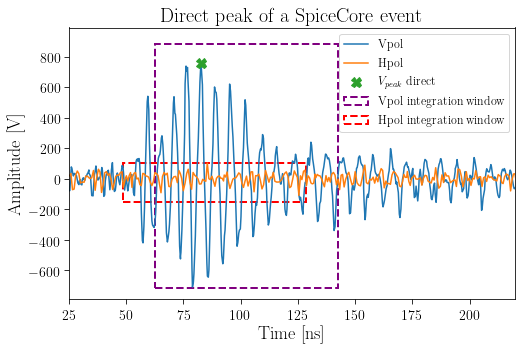

In [197]:
peaks,_ = scipy.signal.find_peaks(wf.v, width=2, height=750)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(wf.t, wf.v, label = "Vpol")
ax.plot(wf2.t, wf2.v, label = "Hpol")


# plt.plot(wf.t, amplitude_envelope, alpha = 0.3)
ax.plot(wf.t[peaks], wf.v[peaks], "X", markersize=10, lw = 20, label = "$V_{peak}$ direct")
ax.set_xlim(25,220)
# ax.set_ylim(-1200,2000)
ax.set_xlabel("Time [ns]")
ax.set_ylabel("Amplitude [V]")
rect = patches.Rectangle((np.array(wf.t[peaks])[0]-20, -720), 80, 1600, linewidth=2, ls = "--", edgecolor='purple', facecolor='none', label = "Vpol integration window")
rect2 = patches.Rectangle((np.array(wf.t[peaks])[0]-20-14.1, -150), 80, 250, linewidth=2,ls = "--", edgecolor='r', facecolor='none', label = "Hpol integration window")

handles, labels = ax.get_legend_handles_labels()
handles.append(Patch(facecolor='orange', edgecolor='r'))
labels.append("Color Patch")
plt.title("Direct peak of a SpiceCore event")
ax.add_patch(rect)
ax.add_patch(rect2)

ax.legend(ncol = 1)
plt.savefig("./plots/SpiceCorePolReco/WfAndWindows.pdf")